# Contents
1. Importing libraries
2. Setting up dataframes
3. Cleaning data and creating a subset
4. Elbow technique and number of clusters
5. k-means
6. Adding a new column
7. Visualizing clustered data
8. Insights on clusters
9. Descriptive statistics
10. Next steps
11. Saving main dataset  

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

### 2. Setting up dataframes

In [3]:
# Defining the main project path
proj = r'C:\Users\bfd_6\Documents\Career Foundry Project\Course Part 2\A6 Adv Analytics and Dashboards\Real Estate Project'

In [4]:
# Creating a data frame for the main real estate dataset
df_re = pd.read_pickle(os.path.join(proj, '02 Data', 'Prepared Data', 're_merged.pkl'))

In [5]:
# I want to see all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df_re.head(3)

,geo_id,us_county,2022 total housing units,2022 occupied housing units,2022 vacant housing units,2022 num_units -1_detached,2022 num_units-1_attached,2022 2 units,2022 3-4 units,2022 5-9 units,2022 10-19 units,2022 20+ units,2022 mobile home,2022 boat_rv_van_etc,2022 built 2020+,2022 built 2010-2019,2022 built 2000-2009,2022 built 1990-1999,2022 built 1980-1989,2022 built 1970-1979,2022 built 1960-1969,2022 built 1950-1959,2022 built 1940-1949,2022 built before 1940,2022 1 room,2022 2 rooms,2022 3 rooms,2022 4 rooms,2022 5 rooms,2022 6 rooms,2022 7 rooms,2022 8 rooms,2022 9+ rooms,2022 no bedroom,2022 1 bedroom,2022 2 bedrooms,2022 3 bedrooms,2022 4 bedrooms,2022 5+ bedrooms,2022 owner-occupied,2022 renter-occupied,2022 move-in 2021+,2022 move-in 2018-2020,2022 move-in 2010-2017,2022 move-in 2000-2009,2022 move-in 1990-1999,2022 move-in before 1990,2022 no vehicles available,2022 1 vehicle available,2022 2 vehicles available,2022 3+ vehicles available,2022 gas heat,2022 lp container heat,2022 electric heat,2022 oil or kerosene heat,2022 coal or coke heat,2022 wood heat,2022 solar heat,2022 other fuel heat,2022 no fuel heat,2022 no full bathroom,2022 no full kitchen,2022 no landline available,2022 1.00 or less occ per room,2022 1.01 to 1.50 occ per room,2022 1.51 or more occ per room,2022 own_occ < $50k,2022 own_occ $50k < $100k,2022 own_occ $100k < $150k,2022 own_occ $150k < $200k,2022 own_occ $200k <$300k,2022 own_occ $300k - $500k,2022 own_occ $500k - $1m,2022 own_occ $1m+,2022 mortgage,2022 no mortgage,2022 rent producing units,2022 gross rent < $500,2022 gross rent $500 < $1k,2022 gross rent $1k < $1.5k,2022 gross rent $1.5k < $2k,2022 gross rent $2k <$2.5k,2022 gross rent $2.5k <$3k,2022 gross rent $3k+,2022 no rent paid,2012 total housing units,2012 occupied housing units,2012 vacant housing units,2012 num_units -1_detached,2012 num units-1_attached,2012 2 units,2012 3-4 units,2012 5-9 units,2012 10-19 units,2012 20+ units,2012 mobile home,2012 boat_rv_van_etc,2012 built 2010+,2012 built 2000-2009,2012 built 1990-1999,2012 built 1980 -1989,2012 built 1970-1979,2012 built 1960-1969,2012 built 1950-1959,2012 built 1940-1949,2012 built before 1940,2012 1 room,2012 2 rooms,2012 3 rooms,2012 4 rooms,2012 5 rooms,2012 6 rooms,2012 7 rooms,2012 8 rooms,2012 9 rooms+,2012 no bedroom,2012 1 bedroom,2012 2 bedrooms,2012 3 bedrooms,2012 4 bedrooms,2012 5 bedrooms+,2012 owner-occupied,2012 renter-occupied,2012 moved in 2010+,2012 moved in 2000-2009,2012 moved in 1990-1999,2012 moved in 1980-1989,2012 moved in 1970 to 1979,2012 moved before 1970,2012 no vehicles available,2012 1 vehicle available,2012 2 vehicles available,2012 3+ vehicles available,2012 gas heat,2012 lp container heat,2012 electric heat,2012 oil or kerosene heat,2012 coal or coke heat,2012 wood heat,2012 solar heat,2012 other fuel heat,2012 no fuel heat,2012 no full bathroom,2012 no full kitchen,2012 no landline available,2012 1.00 or less occ per room,2012 1.01 to 1.50 occ per room,2012 1.51 or more occ per room,"2012 own_occ < $50,000","2012 own_occ $50,000 < $99,999","2012 own_occ $100,000 < $149,999","2012 own_occ $150,000 < $199,999","2012 own_occ $200,000 < $299,999","2012 own_occ $300,000 < $499,999","2012 own_occ $500,000 < $999,999","2012 own_occ $1,000,000+",2012 mortgage,2012 no mortgage,2012 rent producing units,2012 gross rent less than $200,2012 gross rent $200 < $299,2012 gross rent $300 < $499,2012 gross rent $500 < $749,2012 gross rent $750 < $999,"2012 gross rent $1,000 < $1,499","2012 gross rent $1,500+",2012 no rent paid,county,state,st_abbr,region,2022 move-in 2010-2020,2012 move-in before 1980,2022 households,2012 households,2012 ami % usmi,2022 ami % usmi,2022 median income,2012 median income,2012 aff rent,2012 aff purch,2022 aff rent,2022 aff purch,change in units %,fips,coty_gnis_code,2012_income_level,2022_income_level,own_pct_22,own_pct_12
0,0500000US01001,"Autauga County, Alabama",24457,22308,2149,18370,273,145,294,510,500,470,3805,90,169,

### 3. Cleaning data and creating a subset

In [7]:
# Creating a small subset for 2012 data for unsupervised machine learning
df_ml_2012 = df_re[['2012 total housing units', '2012 occupied housing units', '2012 owner-occupied', '2012 mortgage', '2012 aff purch', '2012 mobile home', 'own_pct_12', '2012 aff rent', '2012 median income']]

In [8]:
df_ml_2012.head(3)

,2012 total housing units,2012 occupied housing units,2012 owner-occupied,2012 mortgage,2012 aff purch,2012 mobile home,own_pct_12,2012 aff rent,2012 median income
0,22077,19934,15488,10023,161319,4609,0.776964,1344.325,53773
1,103984,72751,53889,32749,152118,13080,0.740732,1267.650,50706
2,11878,9423,6285,3185,95667,3068,0.666985,797.225,31889


In [9]:
df_ml_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   2012 total housing units     3129 non-null   int64  
 1   2012 occupied housing units  3129 non-null   int64  
 2   2012 owner-occupied          3129 non-null   int64  
 3   2012 mortgage                3129 non-null   int64  
 4   2012 aff purch               3129 non-null   int64  
 5   2012 mobile home             3129 non-null   int64  
 6   own_pct_12                   3129 non-null   float64
 7   2012 aff rent                3129 non-null   float64
 8   2012 median income           3129 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 220.1 KB


In [10]:
df_ml_2012.describe().map(lambda x: f"{x:0,.2f}")

,2012 total housing units,2012 occupied housing units,2012 owner-occupied,2012 mortgage,2012 aff purch,2012 mobile home,own_pct_12,2012 aff rent,2012 median income
count,"3,129.00","3,129.00","3,129.00","3,129.00","3,129.00","3,129.00","3,129.00","3,129.00","3,129.00"
mean,"41,565.52","36,363.31","23,809.06","15,971.40","136,744.75","2,732.87",0.73,"1,139.54","45,581.58"
std,"122,536.64","110,480.05","62,961.56","45,967.92","35,506.24","4,666.04",0.08,295.89,"11,835.41"
min,70.00,35.00,0.00,0.00,"58,872.00",0.00,0.00,490.60,"19,624.00"
25%,"5,398.00","4,259.00","3,188.00","1,551.00","114,042.00",592.00,0.69,950.35,"38,014.00"
50%,"12,136.00","9,788.00","7,162.00","3,928.00","131,451.00","1,492.00",0.74,"1,095.42","43,817.00"
75%,"30,291.00","25,471.00","18,247.00","10,951.00","151,917.00","3,191.00",0.78,"1,265.98","50,639.00"
max,"3,441,416.00","3,218,511.00","1,523,331.00","1,167,183.00","368,532.00","85,377.00",0.95,"3,071.10","122,844.00"


In [11]:
# Dropping the Kalawao County data that was considered an outlier due to unusual circumstances. It was the only county 
# in the US with zero owner-occupied units.
df_ml_2012 = df_ml_2012.loc[df_ml_2012['2012 owner-occupied'] != 0]

In [12]:
df_ml_2012.describe().map(lambda x: f"{x:0,.2f}")

,2012 total housing units,2012 occupied housing units,2012 owner-occupied,2012 mortgage,2012 aff purch,2012 mobile home,own_pct_12,2012 aff rent,2012 median income
count,"3,128.00","3,128.00","3,128.00","3,128.00","3,128.00","3,128.00","3,128.00","3,128.00","3,128.00"
mean,"41,578.78","36,374.92","23,816.67","15,976.50","136,724.93","2,733.75",0.73,"1,139.37","45,574.98"
std,"122,553.99","110,495.80","62,970.19","45,974.38","35,494.60","4,666.53",0.08,295.79,"11,831.53"
min,70.00,35.00,21.00,0.00,"58,872.00",0.00,0.20,490.60,"19,624.00"
25%,"5,414.50","4,259.75","3,191.75","1,551.75","114,034.50",592.00,0.69,950.29,"38,011.50"
50%,"12,136.50","9,797.50","7,167.50","3,929.00","131,440.50","1,492.50",0.74,"1,095.34","43,813.50"
75%,"30,293.75","25,472.25","18,249.25","10,955.00","151,908.00","3,191.25",0.78,"1,265.90","50,636.00"
max,"3,441,416.00","3,218,511.00","1,523,331.00","1,167,183.00","368,532.00","85,377.00",0.95,"3,071.10","122,844.00"


### 4. Elbow technique and number of clusters

In [13]:
# I selected 10 potential clusters as a reasonable maximum number
num_cl = range(1, 10) 
# The following defines the k-means clusters for the range I established.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [14]:
# This creates a variation score for eact cluster
score = [kmeans[i].fit(df_ml_2012).score(df_ml_2012) for i in range(len(kmeans))] 

# Display the score values
score

[-108598857730790.14,
 -53599757904711.42,
 -32257978998250.816,
 -18132555779538.445,
 -14137431103133.229,
 -12318931412915.824,
 -7874302562034.117,
 -6593399524595.086,
 -5670466351307.688]

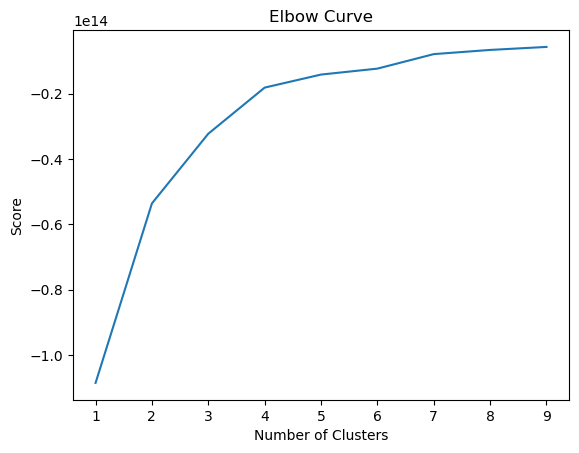

In [15]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on the elbow curve, I noted that there are three candidates for clusters: 2, 3, and 4. 

### 5. k-means

In [16]:
# Create the k-means object.
km_12 = KMeans(n_clusters = 3) 

In [17]:
# Fit the k-means object to the data.
km_12.fit(df_ml_2012)

KMeans(n_clusters=3)

In [18]:
KMeans(n_clusters=3)

KMeans(n_clusters=3)

### 6. Adding a new column

In [19]:
df_ml_2012['clusters'] = km_12.fit_predict(df_ml_2012)

In [20]:
df_ml_2012.head(3)

,2012 total housing units,2012 occupied housing units,2012 owner-occupied,2012 mortgage,2012 aff purch,2012 mobile home,own_pct_12,2012 aff rent,2012 median income,clusters
0,22077,19934,15488,10023,161319,4609,0.776964,1344.325,53773,0
1,103984,72751,53889,32749,152118,13080,0.740732,1267.650,50706,0
2,11878,9423,6285,3185,95667,3068,0.666985,797.225,31889,0


In [21]:
df_ml_2012['clusters'].value_counts()

clusters
0    3000
1     124
2       4
Name: count, dtype: int64

In [22]:
print(df_ml_2012.loc[df_ml_2012['clusters'] ==2])

      2012 total housing units  2012 occupied housing units  \
100                    1636502                      1402149   
201                    3441416                      3218511   
599                    2178739                      1933670   
2610                   1600395                      1412895   

      2012 owner-occupied  2012 mortgage  2012 aff purch  2012 mobile home  \
100                894694         671443          163155             85377   
201               1523331        1167183          168723             53342   
599               1140135         810192          163944             15404   
2610               805652         546169          159480             42029   

      own_pct_12  2012 aff rent  2012 median income  clusters  
100     0.638088       1359.625               54385         2  
201     0.473303       1406.025               56241         2  
599     0.589622       1366.200               54648         2  
2610    0.570214       1329.000      

### 7. Visualizing clustered data

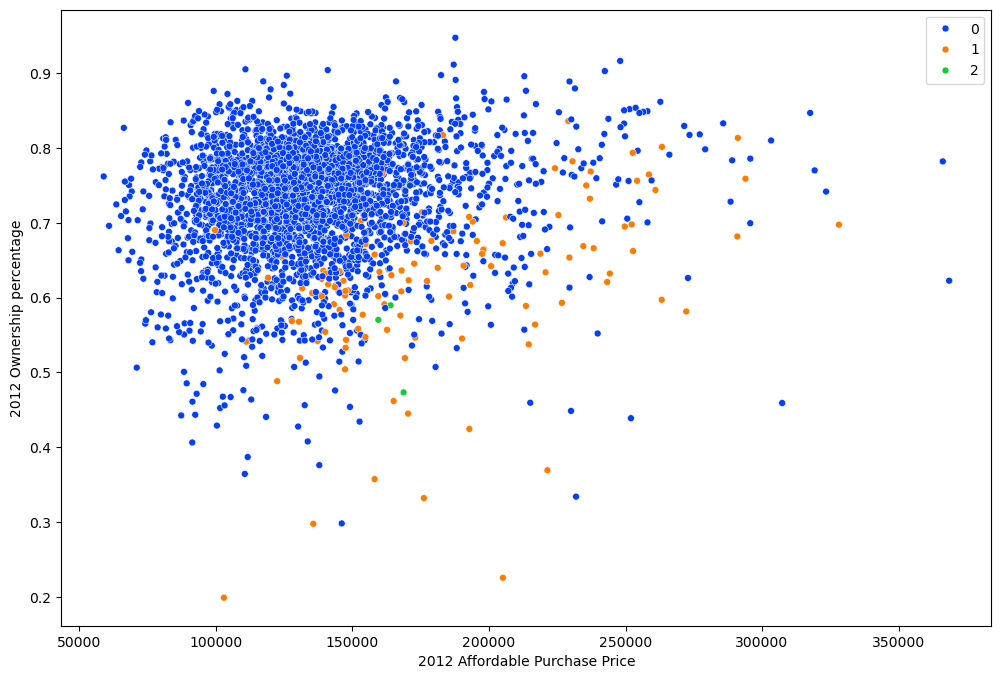

In [23]:
# Plot the clusters for the "2012 aff purch" and "own_pct_12" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ml_2012['2012 aff purch'], y=df_ml_2012['own_pct_12'], hue=km_12.labels_, s=25, palette='bright') 

ax.grid(False) 
plt.xlabel('2012 Affordable Purchase Price') 
plt.ylabel('2012 Ownership percentage') 
plt.show()

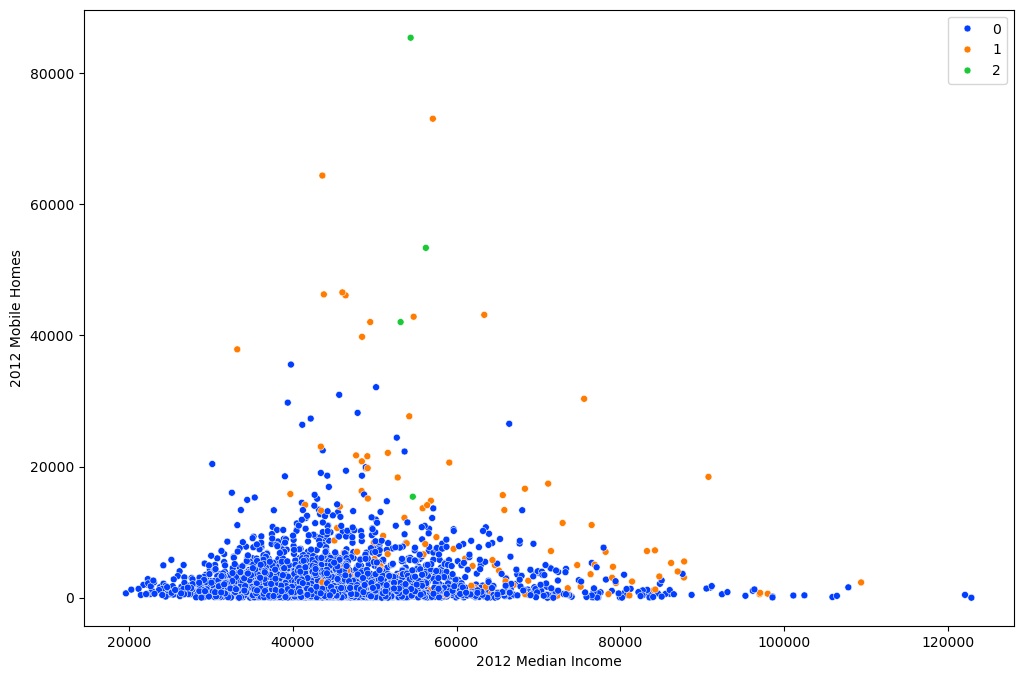

In [24]:
# Plot the clusters for the "2012 median income" and "2012 mobile home" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ml_2012['2012 median income'], y=df_ml_2012['2012 mobile home'], hue=km_12.labels_, s=25, palette='bright') 

ax.grid(False) 
plt.xlabel('2012 Median Income') 
plt.ylabel('2012 Mobile Homes') 
plt.show()

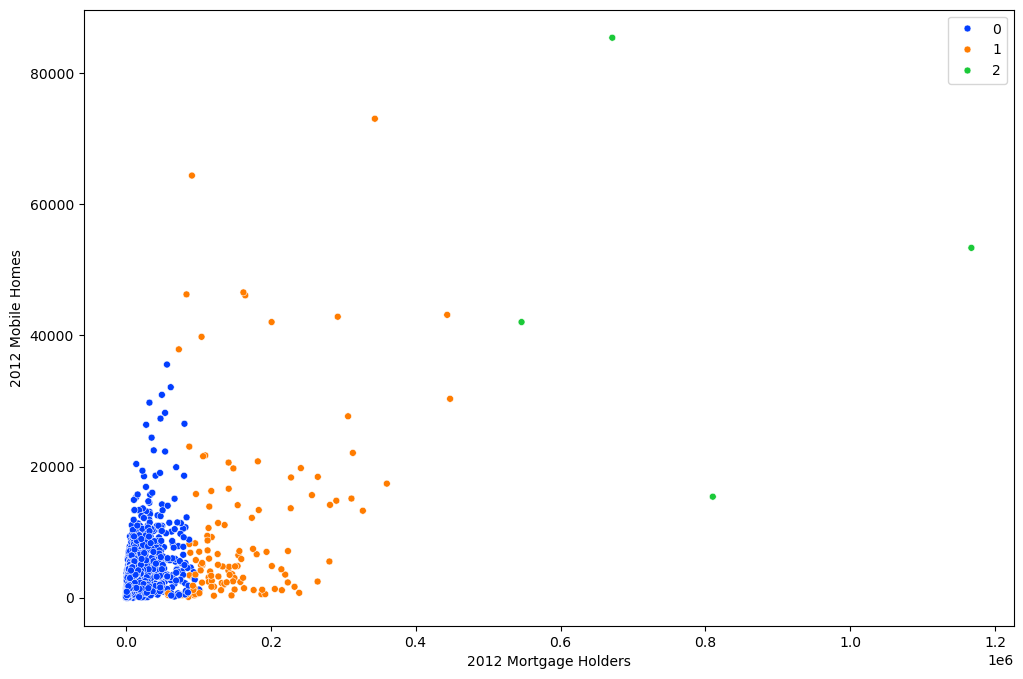

In [25]:
# Plot the clusters for the "2012 mortgage" and "2012 mobile home" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ml_2012['2012 mortgage'], y=df_ml_2012['2012 mobile home'], hue=km_12.labels_, s=25, palette='bright') 

ax.grid(False) 
plt.xlabel('2012 Mortgage Holders') 
plt.ylabel('2012 Mobile Homes') 
plt.show()

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_17900\4272658505.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in cur_xtix])
C:\Users\bfd_6\AppData\Local\Temp\ipykernel_17900\4272658505.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(z) for z in cur_ytix])


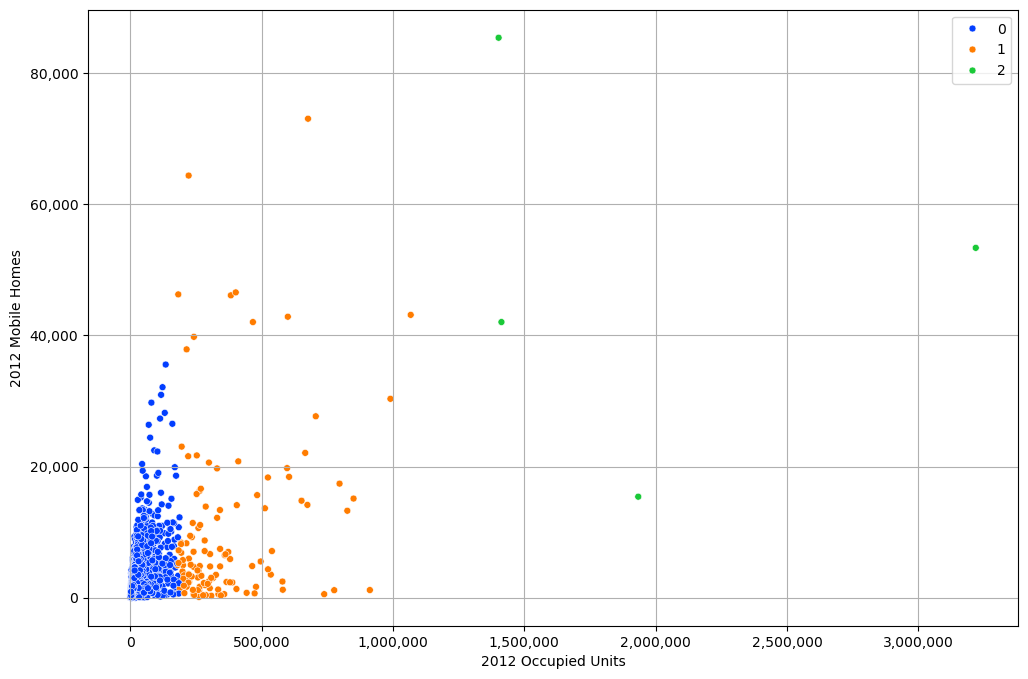

In [26]:
# Plot the clusters for the "2012 occupied housing units" and "2012 mobile home" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ml_2012['2012 occupied housing units'], y=df_ml_2012['2012 mobile home'], hue=km_12.labels_, s=25, palette='bright') 
cur_xtix = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in cur_xtix])
cur_ytix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(z) for z in cur_ytix])
ax.grid(True) 
plt.xlabel('2012 Occupied Units') 
plt.ylabel('2012 Mobile Homes') 
plt.show()

In [27]:
df_ml_2012.loc[df_ml_2012['clusters'] == 2, 'cluster'] = 'High Occ. Counties'
df_ml_2012.loc[df_ml_2012['clusters'] == 1, 'cluster'] = 'Med Occ. Counties'
df_ml_2012.loc[df_ml_2012['clusters'] == 0, 'cluster'] = 'Low Occ. Counties'

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_17900\1131891837.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in cur_xtix])
C:\Users\bfd_6\AppData\Local\Temp\ipykernel_17900\1131891837.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(z) for z in cur_ytix])


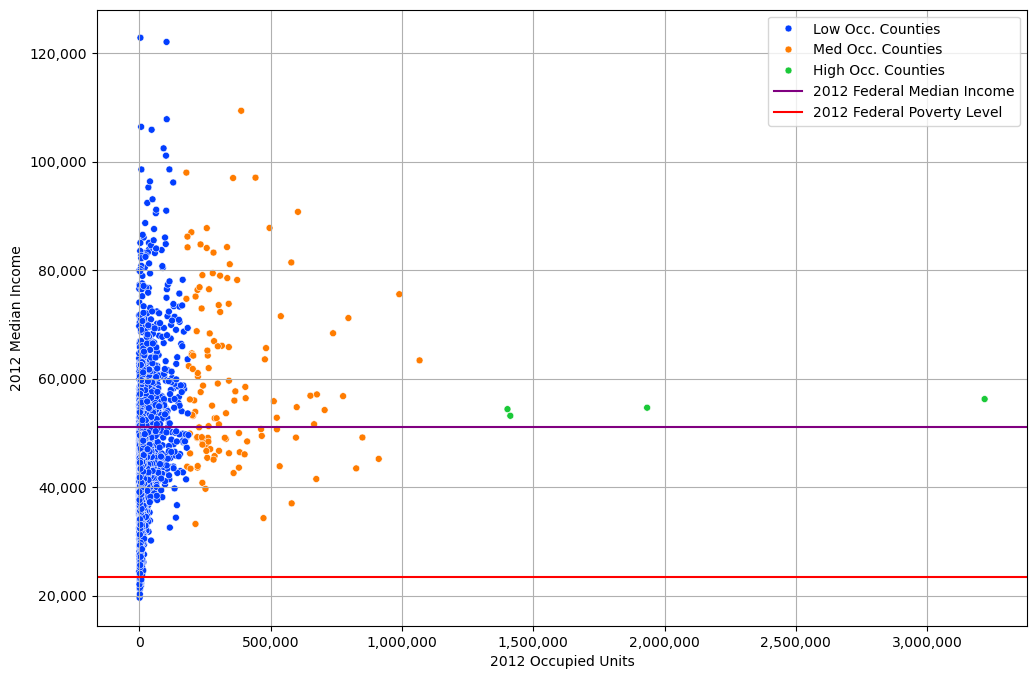

In [28]:
# Plot the clusters for the "2012 occupied housing units" and "2012 median income" variables.
# The purple line at y = 51,020 indicates the 2012 federal median income for households per the US Census Bureau.
# The red line at y = 23,492 indicates the federal poverty level for 2012.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=df_ml_2012, x='2012 occupied housing units', y='2012 median income', hue='cluster', s=25, palette='bright') 
# ax = sns.scatterplot(x=df_ml_2012['2012 occupied housing units'], y=df_ml_2012['2012 median income'], hue=km_12.labels_, s=25, palette='bright') 
cur_xtix = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in cur_xtix])
cur_ytix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(z) for z in cur_ytix])
ax.grid(True)
ax.axhline(y=51020, color='purple', label='2012 Federal Median Income') 
ax.axhline(y=23492, color='red', label='2012 Federal Poverty Level') 
plt.legend()
plt.xlabel('2012 Occupied Units') 
plt.ylabel('2012 Median Income') 
plt.show()

---

### 8. Insights on clusters

#### Both clearly clustered and non-clustered variable interactions have been useful.

- The affordable purchase price (three times the county median income) has no impact on ownership percentage. The vast majority of counties show greater than 60% ownership percentage.
- The majority of mobile home residents are in counties with lower total occupied units, and with median incomes below the national average.
- The bulk of mobile homes residents appear to be in counties with a lower percentage of mortgage holders.
- The relationship between the number of mobile home residents and total occupied units is unclear. It may be better to review this relationship as mobile home residents as a percentage of total occupied units vs. either median income or total occupied units.
- The relationship between occupied units and median income is unclear. Counties with low median income and very high median income appear to have fewer occupied units. Counties with moderate occupied units appear to have median incomes above the national average. Counties with the largest number of occupied units appear to have median incomes slightly above the national average. It is possible that this is a function of economic exclusivity or limitation, coupled with urban/suburban preference.

### 9. Descriptive statistics

In [29]:
df_ml_2012.groupby('cluster').agg({'2012 aff purch':['mean', 'median'], 
                         'own_pct_12':['mean', 'median'], 
                         '2012 median income':['mean', 'median'],
                         '2012 occupied housing units':['mean', 'median'],
                         '2012 mortgage':['mean', 'median'],
                         '2012 mobile home':['mean', 'median']}).map(lambda x: f"{x:0,.2f}")

2012 aff purch             own_pct_12         \
                             mean      median       mean median   
cluster                                                           
High Occ. Counties     163,825.50  163,549.50       0.57   0.58   
Low Occ. Counties      134,828.57  130,327.50       0.73   0.74   
Med Occ. Counties      181,730.30  169,774.50       0.63   0.64   

                   2012 median income            2012 occupied housing units  \
                                 mean     median                        mean   
cluster                                                                        
High Occ. Counties          54,608.50  54,516.50                1,991,806.25   
Low Occ. Counties           44,942.86  43,442.50                   20,360.14   
Med Occ. Counties           60,576.77  56,591.50                  360,750.91   

                                 2012 mortgage             2012 mobile home  \
                          median          mean      median             mean   
cluster                                                                       
High Occ. Counties  1,673,282.50    798,746.75  740,817.50        49,038.00   
Low Occ. Counties       9,230.50      9,067.73    3,634.50         2,357.51   
Med Occ. Counties     291,084.00    157,873.50  136,042.50        10,342.48   

                               
                       median  
cluster                        
High Occ. Counties  47,685.50  
Low Occ. Counties    1,446.00  
Med Occ. Counties    4,967.50

---

### 10. Next steps

#### More exploration and using the insights to answer project questions. 

- As mentioned in the insights section, additional fields may be needed to further explore the insights gained.
- The insights in this part of exploration appear to tie directly to the fact vs. paradigm question for housing affordability. The same testing conducted on the 2012 data must be repeated for 2022 data so the two tests may be compared. 
- The data must be prepared for use in Tableau for presentation visuals. 

### 11. Saving main dataset

In [30]:
# Exporting pkl file to prepared data folder for the current df_re_merged dataset. 
df_re.to_pickle(os.path.join(proj, '02 Data', 'Prepared Data', 're_merged.pkl'))